In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
import tensorflow as tf

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000,28,28,1))

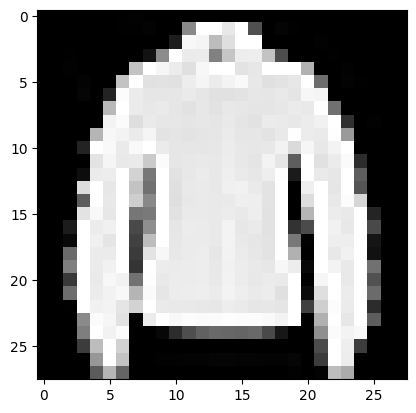

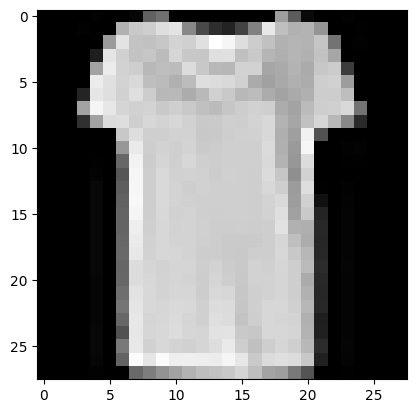

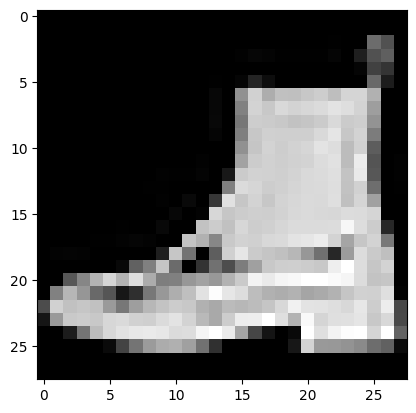

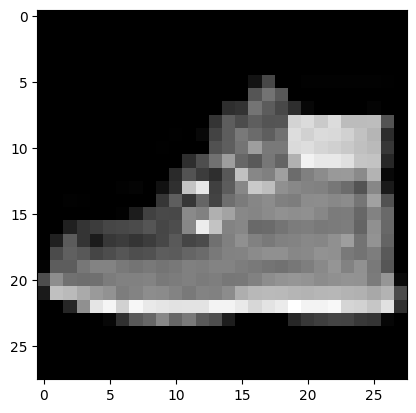

In [ ]:
for i in range(4):
  random_index = random.randint(0, len(train_images))
  plt.imshow(train_images[random_index].reshape(28,28),cmap='gray')
  plt.show()

In [ ]:
def display(o, t, title1, title2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(o, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(t, cmap='gray')
    plt.axis('off')

    plt.show()

In [ ]:
#Image negatives
def neg(img):
    neg = 255 - img
    return neg

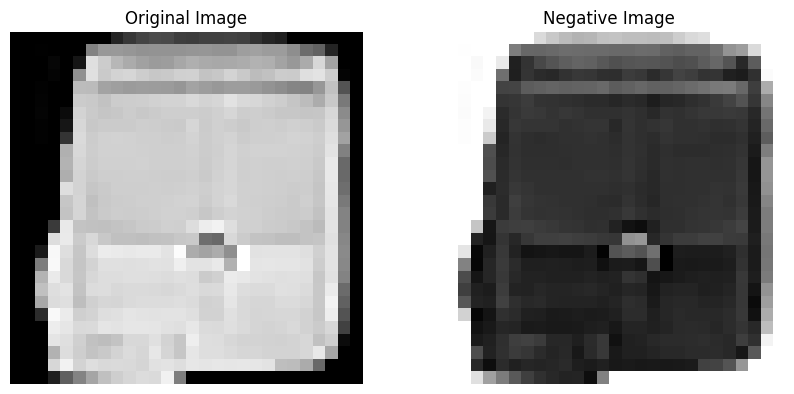

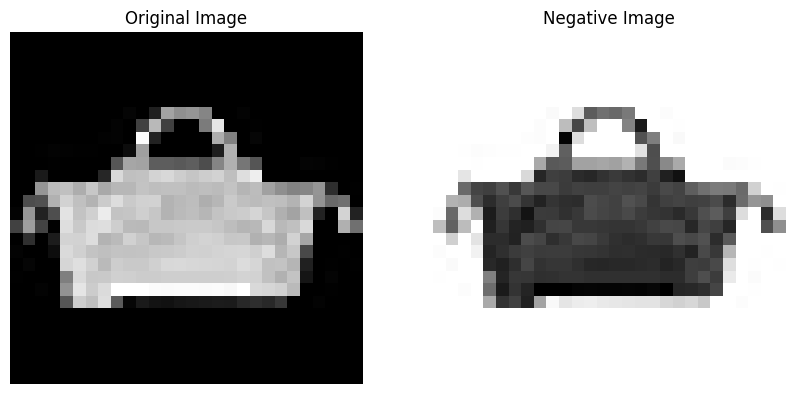

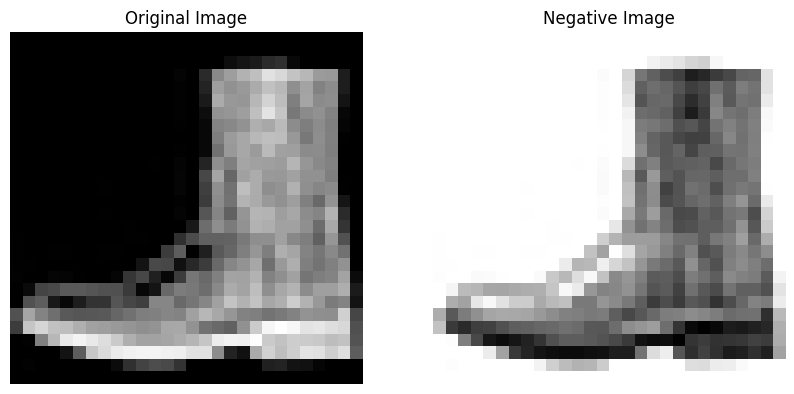

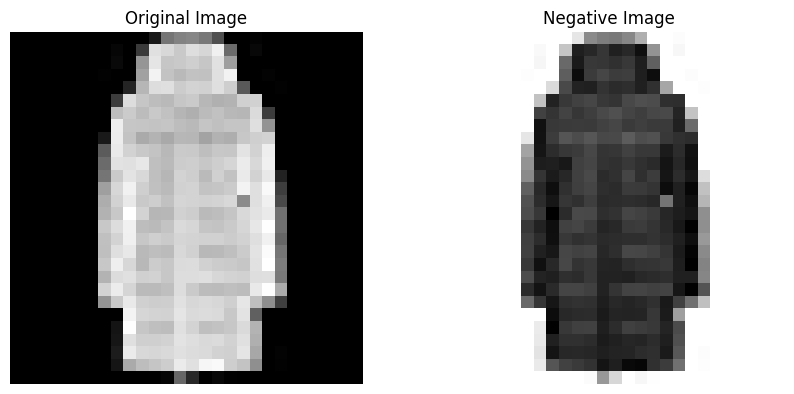

In [ ]:
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_negative = neg(img)
    display(img, img_negative, 'Original Image', 'Negative Image')

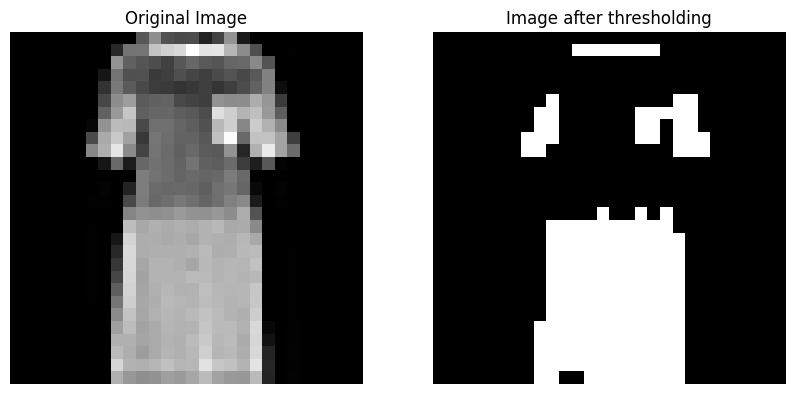

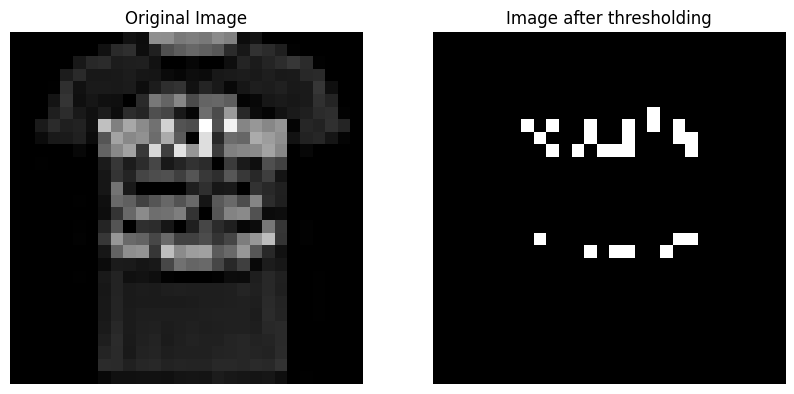

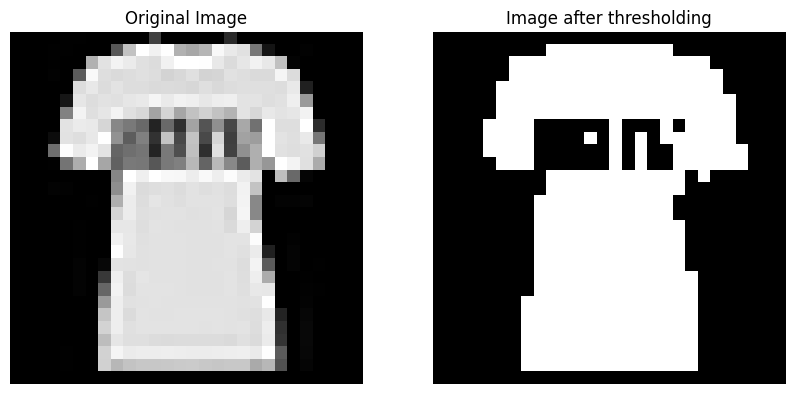

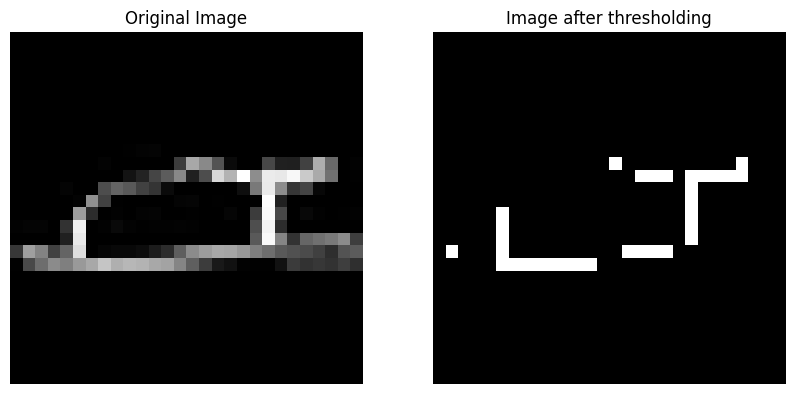

In [ ]:
def thresholding(img, threshold=150):
    new_img = np.where(img >= threshold, 255, 0)
    return new_img
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_t = thresholding(img)
    display(img, img_t, 'Original Image', 'Image after thresholding')

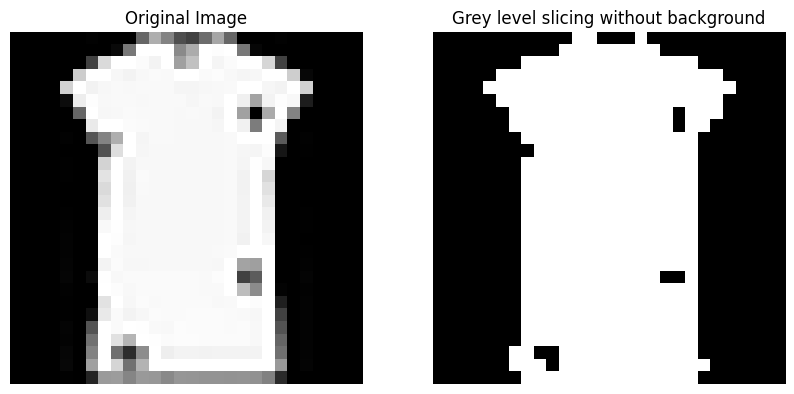

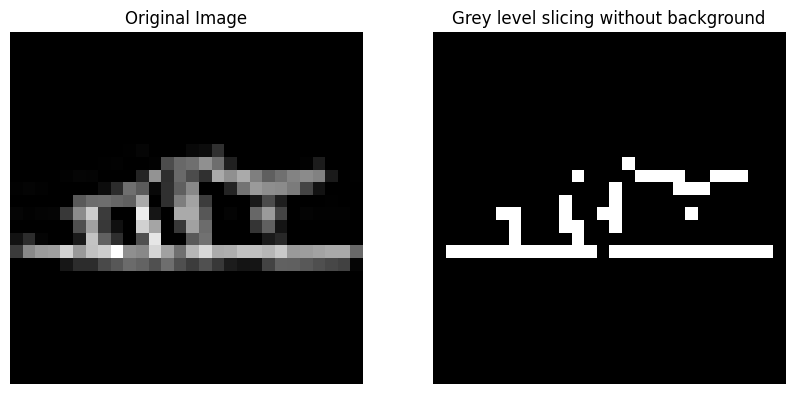

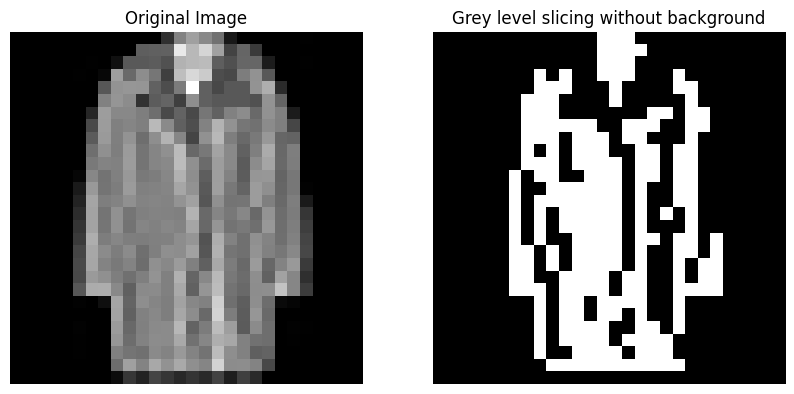

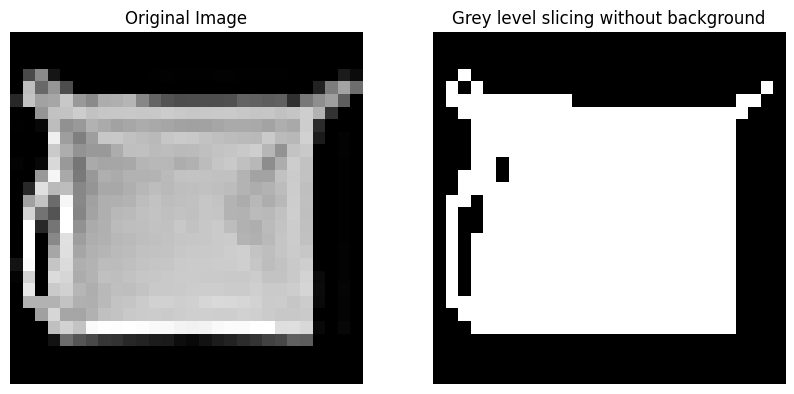

In [ ]:
#Grey level slicing without background
def gls_wbg(img, a, b):
    g = np.where((img >= a) & (img <= b), 255, 0)
    return g
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_g = thresholding(img)
    display(img, img_g, 'Original Image', 'Grey level slicing without background')

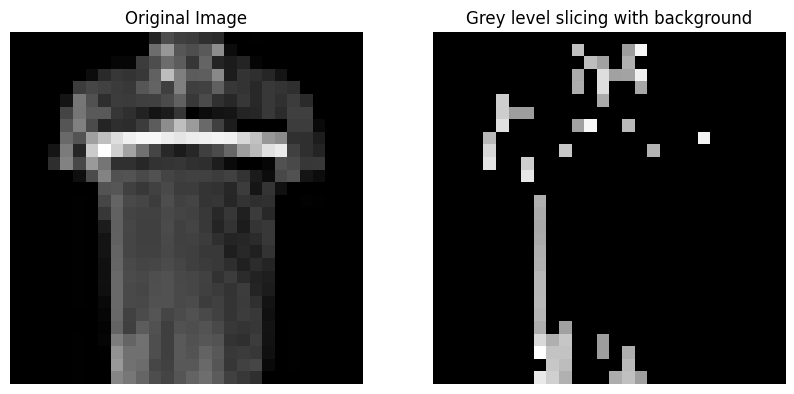

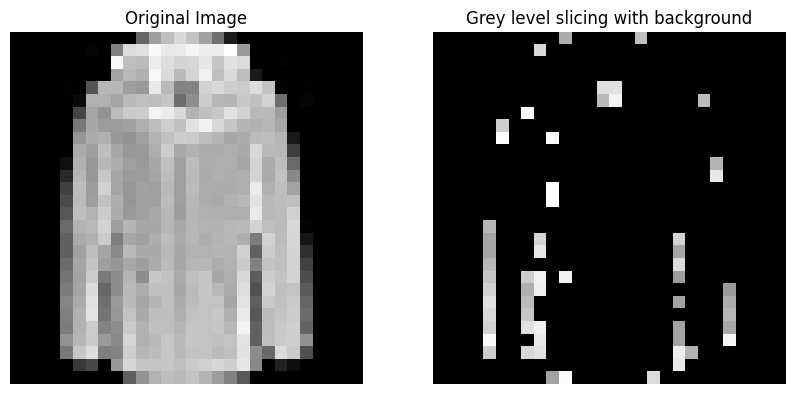

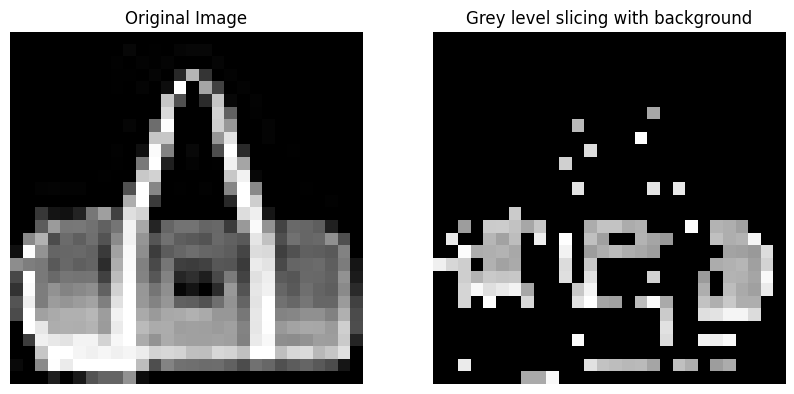

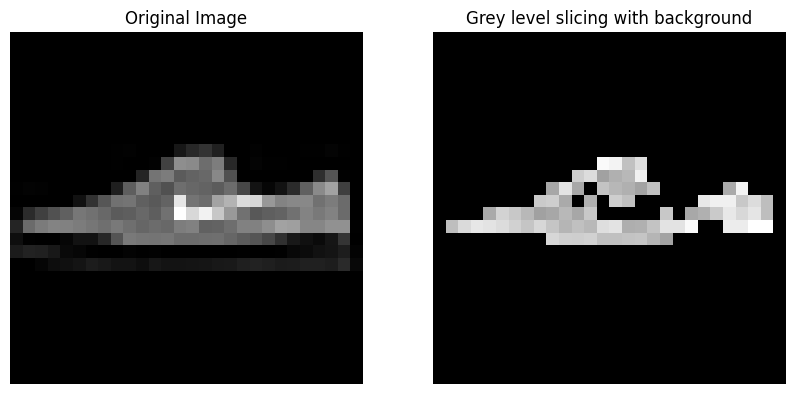

In [ ]:
#grey level slicing with background
def gls_bg(img, a, b):
    gb = np.where((img >= a) & (img <= b), img, 0)
    return gb
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_gb = gls_bg(img,90,150)
    display(img, img_gb, 'Original Image', 'Grey level slicing with background')

In [ ]:
img_path = "/content/white_cat.jpg"
image = cv2.imread(img_path,1)

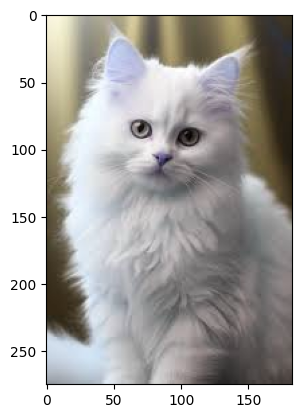

In [ ]:
plt.imshow(image,cmap="gray")

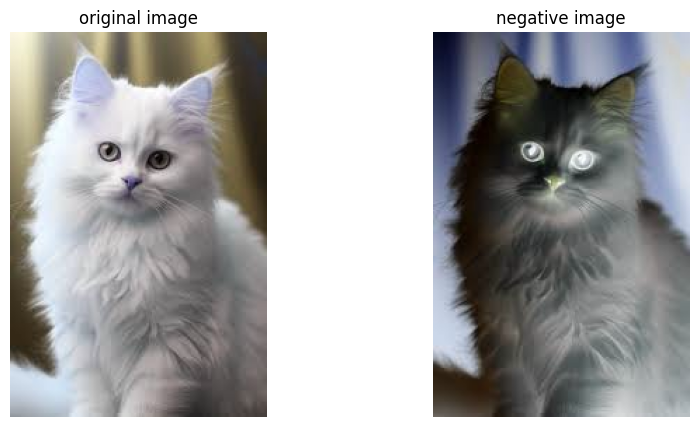

In [ ]:
n = neg(image)
display(image,n,"original image","negative image")

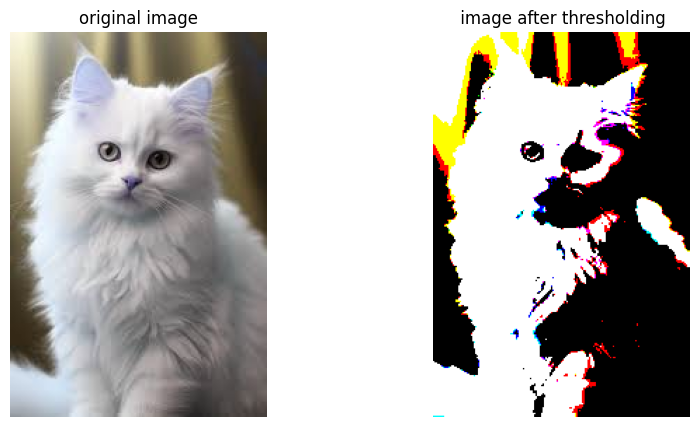

In [ ]:
m = thresholding(image)
display(image,m,"original image"," image after thresholding")

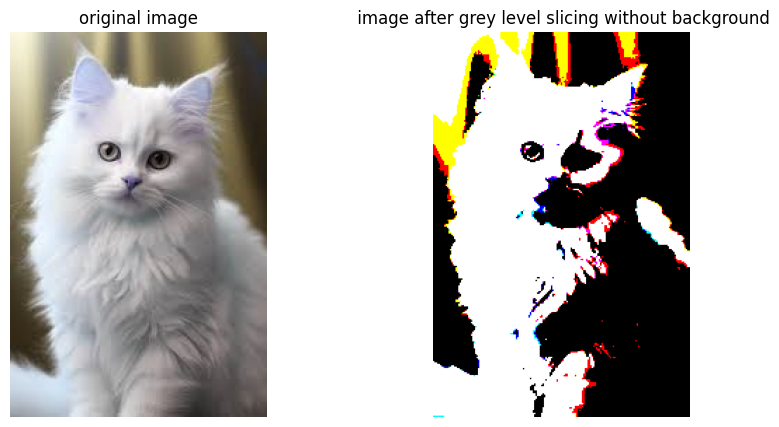

In [ ]:
p = gls_wbg(image,75,100)
display(image,m,"original image"," image after grey level slicing without background")

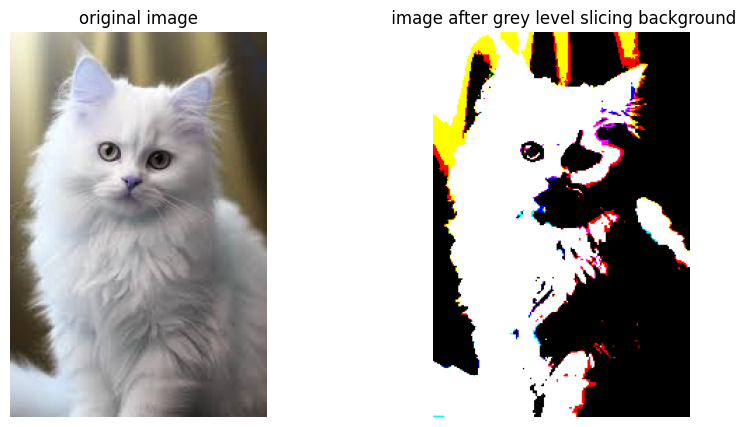

In [ ]:
q = gls_bg(image,20,80)
display(image,m,"original image"," image after grey level slicing background")

In [ ]:
def same(p,q):
  p = p.astype(np.float32)
  q = q.astype(np.float32)

  if p.shape != q.shape:
      print("Size is different")
  else:
      diff = cv2.absdiff(p, q)
      if np.count_nonzero(diff) == 0:
          print("Same")
      else:
          print("different")

In [ ]:
same(p,q)

different


In [ ]:
same(m,p)

different


In [ ]:
same(m,q)

different


Conclusion : In this experiment we performed we learned about getting negative of a image, Thresholding, Grey level slicing with background, grey level without background. These techniques can be usefull while working with satellite images, scanning anomalies, remote sensing, X-ray imaging,etc.